In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools as it
import math
import scipy.stats as stats
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]
print(sample)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [4]:
len(sample)

36

In [5]:
sum(sample[0])

2

In [6]:
sum(sample[35])

12

In [7]:
z = [sum(point) for point in sample]
z

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

In [8]:
for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    print(event)
    print(f"z = {i} : {len(event)} / {len(sample)}")

[(1, 1)]
z = 2 : 1 / 36
[(1, 2), (2, 1)]
z = 3 : 2 / 36
[(1, 3), (2, 2), (3, 1)]
z = 4 : 3 / 36
[(1, 4), (2, 3), (3, 2), (4, 1)]
z = 5 : 4 / 36
[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
z = 6 : 5 / 36
[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
z = 7 : 6 / 36
[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]
z = 8 : 5 / 36
[(3, 6), (4, 5), (5, 4), (6, 3)]
z = 9 : 4 / 36
[(4, 6), (5, 5), (6, 4)]
z = 10 : 3 / 36
[(5, 6), (6, 5)]
z = 11 : 2 / 36
[(6, 6)]
z = 12 : 1 / 36


In [9]:
px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

print(np.array(px).round(3))

[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]


In [10]:
list(zip(list(range(2, 13)), px))

[(2, 0.027777777777777776),
 (3, 0.05555555555555555),
 (4, 0.08333333333333333),
 (5, 0.1111111111111111),
 (6, 0.1388888888888889),
 (7, 0.16666666666666666),
 (8, 0.1388888888888889),
 (9, 0.1111111111111111),
 (10, 0.08333333333333333),
 (11, 0.05555555555555555),
 (12, 0.027777777777777776)]

In [11]:
df = pd.DataFrame()
df["Z"] = np.array(range(2, 13))
df["Probability"] = px

df.round(3)

,Z,Probability
0,2,0.028
1,3,0.056
2,4,0.083
3,5,0.111
4,6,0.139
5,7,0.167
6,8,0.139
7,9,0.111
8,10,0.083
9,11,0.056


In [12]:
def roll_die():
    """
    returns a random int between 1 and 6
    """
    return rng.choice([1, 2, 3, 4, 5, 6])

In [13]:
def roll_two_dice(n):
    """
    returns a random int between 2 and 12
    """
    rolls = []
    for i in range(n):
        two_dice = roll_die() + roll_die()
        rolls.append(two_dice)
    return rolls


In [14]:
nrolls = 100000
res = roll_two_dice(nrolls)
print(*res[1:50])

7 9 6 3 10 10 10 5 9 7 8 9 8 7 5 5 7 11 6 6 8 7 9 10 7 6 4 5 10 11 9 5 9 4 7 4 8 4 9 9 6 9 3 10 8 9 8 7 5


In [15]:
df = pd.DataFrame()
df["y"] = res 

In [16]:
abs_freqs = df["y"].value_counts().sort_index()
px = abs_freqs / nrolls
list(zip(list(range(2, 13)), px))

[(2, 0.0279),
 (3, 0.05467),
 (4, 0.083),
 (5, 0.11032),
 (6, 0.13932),
 (7, 0.16827),
 (8, 0.13834),
 (9, 0.11061),
 (10, 0.08499),
 (11, 0.05482),
 (12, 0.02776)]

In [17]:
def same_date(num_people, num_same):
    # initialize list from 0 to 365
    possible_dates = range(366)
    # list of zeros
    birthdays = [0] * 366
    # increments by 1 the days corresponding to to the randomly chosen
    # birthdays of num_people individuals
    for p in range(num_people):
        birth_date = rng.choice(possible_dates)
        birthdays[birth_date] += 1
    # True if at least one day records a number of birthdays >= num_same;
    # False otherwise
    return max(birthdays) >= num_same


def birthday_prob(num_people, num_same, num_trials):
    num_hits = 0
    # repeat the simulation num_trials times
    for t in range(num_trials):
        # if same_date() returns True, then increment num_hits by 1
        if same_date(num_people, num_same):
            num_hits += 1
    return num_hits / num_trials


for num_people in [10, 23, 30]:
    print(
        "For",
        num_people,
        "est. prob. of a shared birthday is",
        birthday_prob(num_people, 2, 10000),
    )
    numerator = math.factorial(366)
    denom = (366**num_people) * math.factorial(366 - num_people)
    print("Actual prob. for N = 100 =", 1 - numerator / denom)


For 10 est. prob. of a shared birthday is 0.1203
Actual prob. for N = 100 = 0.1166454118039999


For 23 est. prob. of a shared birthday is 0.5122
Actual prob. for N = 100 = 0.5063230118194599


For 30 est. prob. of a shared birthday is 0.707
Actual prob. for N = 100 = 0.7053034120089917


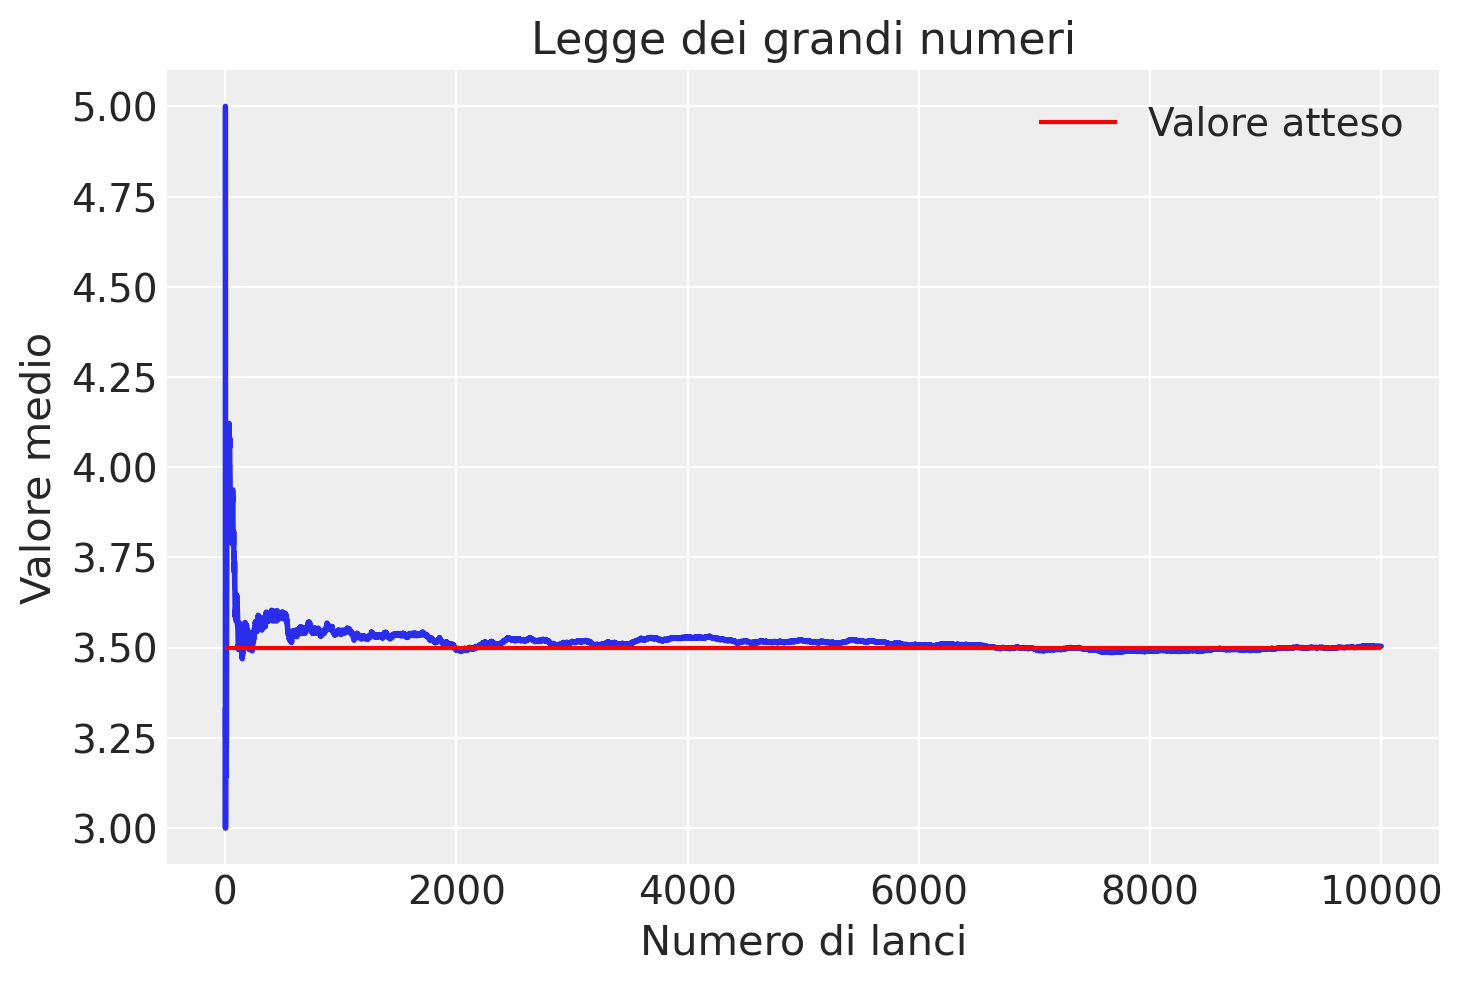

In [18]:
def simulate_dice_rolls(num_rolls):
    """Simulate dice rolls and return the average value for each roll."""
    total = 0
    averages = []
    for i in range(1, num_rolls + 1):
        roll = roll_die()
        total += roll
        averages.append(total / i)
    return averages


def plot_dice_rolls(averages, num_rolls):
    """
    Plot the average value after each dice roll.
    """
    x = range(1, num_rolls + 1)
    plt.plot(x, averages, linewidth=2)
    plt.hlines(y=3.5, xmin=0, xmax=num_rolls, color="red", label="Valore atteso")
    plt.xlabel("Numero di lanci")
    plt.ylabel("Valore medio")
    plt.title("Legge dei grandi numeri")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    num_rolls = 10000
    averages = simulate_dice_rolls(num_rolls)
    plot_dice_rolls(averages, num_rolls)


In [19]:
def count_same_birthdays(birthday_list):
    same_birthdays = {}
    for name, birthday in birthday_list:
        if birthday in same_birthdays:
            same_birthdays[birthday].append(name)
        else:
            same_birthdays[birthday] = [name]

    return same_birthdays


# Example input with 5 students
birthday_list = [
    ("Mario Rossi", "agosto 3"),
    ("Giovanna Bianchi", "agosto 3"),
    ("Maria Neri", "agosto 3"),
    ("Francesco Ferrari", "giugno 12"),
    ("Alice Esposito", "maggio 26"),
    ("Giovanna Romano", "giugno 12"),
    ("Maria Gallo", "agosto 3"),
]

same_birthdays = count_same_birthdays(birthday_list)

# Print shared birthdays
for birthday, students in same_birthdays.items():
    if len(students) > 1:
        print(f"Compleanno {birthday}: {', '.join(students)}")

Compleanno agosto 3: Mario Rossi, Giovanna Bianchi, Maria Neri, Maria Gallo
Compleanno giugno 12: Francesco Ferrari, Giovanna Romano


In [20]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Nov 09 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

arviz     : 0.16.1
matplotlib: 3.8.0
scipy     : 1.11.3
numpy     : 1.25.2
pandas    : 2.1.1

Watermark: 2.4.3

